In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from exercise_2_11 import *

# Parameters studies with stationary bandit problems

In [2]:
num_simulations = 1000
num_steps = 1000
num_actions = 10
exploration_probabilities = (1/128, 1/64, 1/32, 1/16, 1/8, 1/4)
eps_greedy_results_stationary = [
    np.average(run_multiple_action_value_methods(num_simulations, num_steps, num_actions, True, ep, 0)[0]) for ep in exploration_probabilities
]
inital_action_value_estimates = (1/4, 1/2, 1, 2, 4)
optimistic_initialization_results_stationary = [
    np.average(run_multiple_action_value_methods(num_simulations, num_steps, num_actions, True, 0, ie, 0.1)[0]) for ie in inital_action_value_estimates
]
uncertainty_constants = (1/16, 1/8, 1/4, 1/2, 1, 2, 4)
ucb_results_stationary = [
    np.average(run_multiple_action_value_methods(num_simulations, num_steps, num_actions, True, None, 0, None, uc)[0]) for uc in uncertainty_constants
]
constant_step_sizes = (1/32, 1/16, 1/8, 1/4, 1/2, 1, 2, 4)
gradient_results_stationary = [
    np.average(run_multiple_gradient_methods(num_simulations, num_steps, num_actions, True, cs)[0]) for cs in constant_step_sizes
]

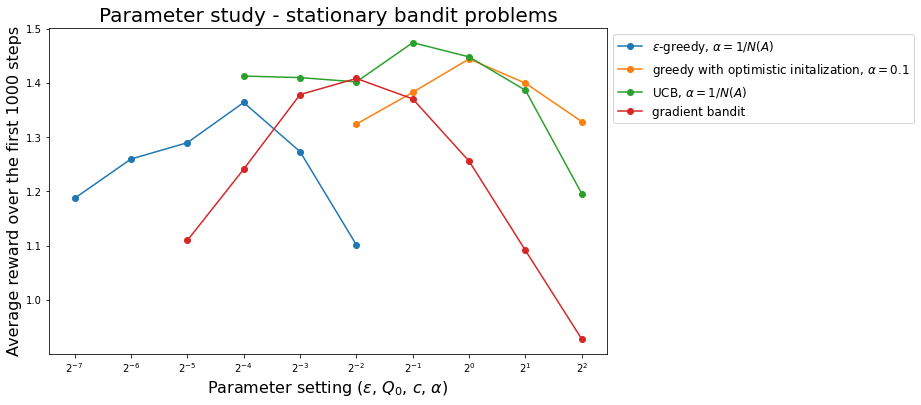

In [3]:
plt.subplots(figsize=(10, 6))
plt.plot(exploration_probabilities, eps_greedy_results_stationary, marker="o", label="$\epsilon$-greedy, $\\alpha = 1/N(A)$")
plt.plot(inital_action_value_estimates, optimistic_initialization_results_stationary, marker="o", label="greedy with optimistic initalization, $\\alpha = 0.1$")
plt.plot(uncertainty_constants, ucb_results_stationary, marker="o", label="UCB, $\\alpha = 1/N(A)$")
plt.plot(constant_step_sizes, gradient_results_stationary, marker="o", label="gradient bandit")
plt.xscale("log", base=2)
plt.xticks((1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1, 2, 4))
plt.legend(fontsize=12)
plt.xlabel("Parameter setting ($\epsilon$, $Q_0$, $c$, $\\alpha$)", fontsize=16)
plt.ylabel("Average reward over the first 1000 steps", fontsize=16)
plt.title("Parameter study - stationary bandit problems", fontsize=20)
plt.savefig("parameter_study_stationary.png", facecolor="white", transparent=False)

# Parameter studies with nonstationary bandit problems

In [4]:
num_simulations = 100
num_steps = 200000
num_actions = 10
num_last_steps_to_average = 100000
eps_greedy_result_nonstationary = [
    np.average(run_multiple_action_value_methods(num_simulations, num_steps, num_actions, False, ep, 0)[0][-num_last_steps_to_average:])
    for ep in exploration_probabilities
]
eps_greedy_constant_step_size_results_nonstationary = [
    np.average(run_multiple_action_value_methods(num_simulations, num_steps, num_actions, False, ep, 0, 0.1)[0][-num_last_steps_to_average:])
    for ep in exploration_probabilities
]
optimistic_initialization_results_nonstationary = [
    np.average(run_multiple_action_value_methods(num_simulations, num_steps, num_actions, False, 0, ie, 0.1)[0][-num_last_steps_to_average:])
    for ie in inital_action_value_estimates
]
ucb_results_nonstationary = [
    np.average(run_multiple_action_value_methods(num_simulations, num_steps, num_actions, False, None, 0, None, uc)[0][-num_last_steps_to_average:])
    for uc in uncertainty_constants
]
gradient_results_nonstationary = [
    np.average(run_multiple_gradient_methods(num_simulations, num_steps, num_actions, False, cs)[0][-num_last_steps_to_average:])
    for cs in constant_step_sizes
]

NameError: name 'eps_greedy_results_nonstationary' is not defined

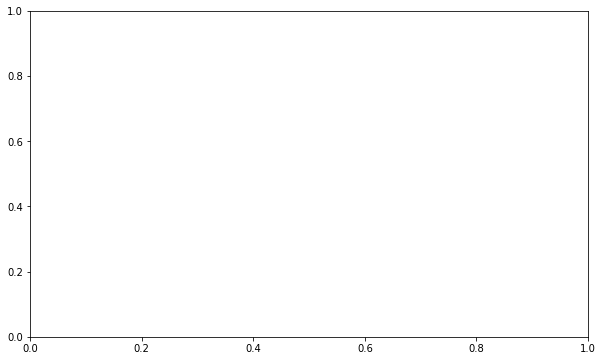

In [ ]:
plt.subplots(figsize=(10, 6))
plt.plot(exploration_probabilities, eps_greedy_results_nonstationary, marker="o", label="$\epsilon$-greedy, $\\alpha = 1/N(A)$")
plt.plot(exploration_probabilities, eps_greedy_constant_step_size_results_nonstationary, marker="o", label="$\epsilon$-greedy, $\\alpha = 0.1$")
plt.plot(inital_action_value_estimates, optimistic_initialization_results_nonstationary, marker="o", label="greedy with optimistic initalization, $\\alpha = 0.1$")
plt.plot(uncertainty_constants, ucb_results_nonstationary, marker="o", label="UCB, $\\alpha = 1/N(A)$")
plt.plot(constant_step_sizes, gradient_results_nonstationary, marker="o", label="gradient bandit")
plt.xscale("log", base=2)
plt.xticks((1/128, 1/64, 1/32, 1/16, 1/8, 1/4, 1/2, 1, 2, 4))
plt.legend(fontsize=12)
plt.xlabel("Parameter setting ($\epsilon$, $\epsilon$, $Q_0$, $c$, $\\alpha$)", fontsize=16)
plt.ylabel("Average reward over steps 100001-200000", fontsize=16)
plt.title("Parameter study - nonstationary bandit problems", fontsize=20)
plt.savefig("parameter_study_nonstationary.png", facecolor="white", transparent=False)